In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import math

import torch
from pytorch_pretrained_bert import BertTokenizer, BertForMaskedLM
from tqdm import tqdm

import matplotlib.pyplot as plt

In [8]:
torch.cuda.is_available()

True

In [9]:
bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [13]:
def get_score(sentence: str):
    tokenize_input = bert_tokenizer.tokenize(sentence)
    tensor_input = torch.tensor([bert_tokenizer.convert_tokens_to_ids(tokenize_input)])
    predictions = bert_model(tensor_input)
    loss_fct = torch.nn.CrossEntropyLoss()
    loss = loss_fct(predictions.squeeze(), tensor_input.squeeze()).data
    return math.exp(loss)

def sorted_tuple_scores(tuple_data_path: str):
    scores = []
    with open(tuple_data_path, 'r') as f:
        for line in tqdm(f.readlines()):
            line = line.strip()
            sentence = " ".join(line.split('\t'))
            scores.append((line, get_score(sentence)))
    scores.sort(key=lambda x: x[1])
    return scores

def print_scores(scores: list):
    print("Lowest losses:")
    print(*scores[:5], sep="\n")
    print()

    print("Highest losses:")
    print(*scores[-5:], sep="\n")

In [14]:
openbook_scores = sorted_tuple_scores('data/openbook/openbook_tuples.tsv')
print_scores(openbook_scores)

100%|██████████| 3793/3793 [01:45<00:00, 35.94it/s]

Lowest losses:
("object 's temperature\tmoving object to\tplace", 3.436337120787915)
('xylem\tcarries water from\troots of plant to leaves of plant', 3.6570767232003276)
('body part\twas\tthen exposed to lot of heat energy', 3.8580220825100944)
('winter solstice\tis on\tJune 21st in southern hemisphere', 4.4127139915636)
('winter solstice\tis on\tJune 21st in hemisphere', 4.442768395771769)

Highest losses:
('surface\tcontains\tcraters', 387543.45942486374)
('doorbell\tconverts\tenergy', 445958.5548566959)
('balance\tmeasuring\tmass', 898241.0840290628)
('smoking\tcauses\tdamage', 953724.6695455363)
('difficulty\tseeing\toctopus', 1276891.7781282486)


[]

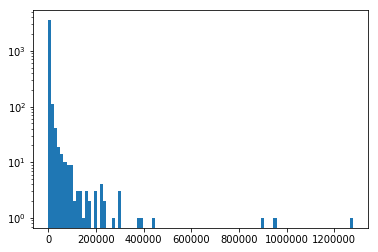

In [20]:
hist_data = [x[1] for x in openbook_scores]
plt.hist(hist_data, bins=100, log=True)
plt.plot()

In [11]:
aristo_scores = sorted_tuple_scores('data/aristo/aristo.txt')
print(aristo_scores)

FileNotFoundError: [Errno 2] No such file or directory: 'data/aristo/aristo.txt'

In [40]:
with open('data/sorted_openbook_tuples.tsv', 'w') as f:
    print(*(x[0] for x in openbook_scores), sep='\n', file=f)
